In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv("greatlakedata/ontario1918.csv", header = 2, index_col = 0) #read data
data = data.drop([2021, 2022]) #drop years with nan values
a = data.unstack().values #unstack 2d data into one long 1d list

In [3]:
data_average = np.mean(a) #standardization
data_deviation = np.std(a)
for i in range(len(a)):
    a[i] -= data_average
    a[i] /= data_deviation

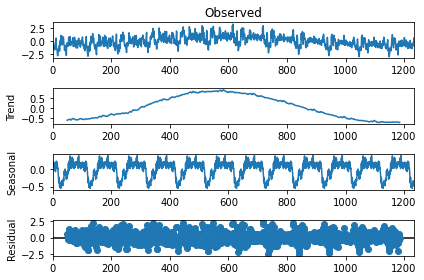

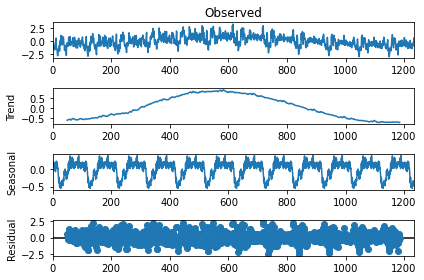

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose #decompose data into seasonal components
result = seasonal_decompose(a, model='additive', period = 100) 
result.plot()


In [6]:
a = result.trend[np.logical_not(np.isnan(result.trend))] #a 里面是我用来跑的数据
print(a)
print(len(a))

[-0.5878341  -0.58552357 -0.57714791 ... -0.70350482 -0.69873936
 -0.69339627]
1136
